In [1]:
# import necessary libraries
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

In [2]:
# checking for the encoding
import chardet

data_path = 'dataset/heart.csv'
with open(data_path, 'rb') as f:
    result = chardet.detect(f.read())
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [3]:
# load the data
df = pd.read_csv(data_path, encoding=result['encoding'])
print(df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

## Metadata
1. age => age of patients
2. sex => gender of patients (1 = male; 0 = female)
3. cp => chest pain type (4 values)
4. trestbps => resting blood pressure
5. chol => serum cholestoral in mg/dl
6. fbs => fasting blood sugar > 120 mg/dl
7. restecg => resting electrocardiographic results (values 0,1,2)
8. thalach => maximum heart rate achieved
9. exang => exercise induced angina (1 = yes; 0 = no)
10. oldpeak => ST depression induced by exercise relative to rest
11. slope => the slope of the peak exercise ST segment
12. ca => number of major vessels (0-3) colored by flourosopy
13. thal => (0 = normal; 1 = fixed defect; 2 = reversable defect)
14. target => presence of heart disease in the patient (0 = normal; 1 = detected)
    

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [4]:
#check unique column
df.columns.unique()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# Check unique values for selected columns
for feature in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'thal', 'target']:
    feature_unique = df[feature].unique()
    print(feature, len(feature_unique), 'unique values are:', feature_unique)

sex 2 unique values are: [1 0]
cp 4 unique values are: [0 1 2 3]
fbs 2 unique values are: [0 1]
restecg 3 unique values are: [1 0 2]
exang 2 unique values are: [0 1]
ca 5 unique values are: [2 0 1 3 4]
thal 4 unique values are: [3 2 1 0]
target 2 unique values are: [0 1]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# change data type to categorical for 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal'
# list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
# df[list] = df[list].astype('category')
# df.info()

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#check missing value
df.isnull().values.any()

False

In [10]:
df_corr = df.copy()
df_corr = df_corr.corr()

text = df_corr.round(2).values

fig_corr = px.imshow(df_corr.values, x=df_corr.columns, y=df_corr.columns, 
                        color_continuous_scale='Viridis', aspect="auto",
                        title="Correlation")
fig_corr.update_traces(text=text, texttemplate="%{text}")

fig_corr.show()

In [11]:
df_corr["target"].abs().sort_values(ascending=False)

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64

`fbs` has the least correlation coefficient to target

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

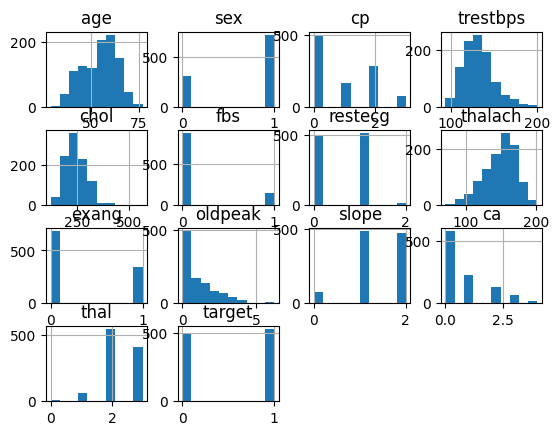

In [12]:
# Get histogram by matplotlib
df_hist = df.copy()
df_hist.hist()

In [13]:
# Get histogram by plotly.express
df_hist = df.copy()
for column in df.columns:
    # fig_hist = ff.create_distplot([df_hist[column]], [column], show_hist=True, show_curve=True)
    fig_hist = px.histogram(df_hist, x=column)
    fig_hist.update_layout(width=400, height=320, title=f'Histogram of {column}')
    fig_hist.show()

Let's try to further analysis for the relationship between two columns

In [14]:
# Which gender has higer chance of getting heart disease?
df_gen_tar = df.copy()

df_gen_tar['sex'] = df_gen_tar['sex'].astype(object)
df_gen_tar['target'] = df_gen_tar['target'].astype('category')

df_gen_tar = df_gen_tar.groupby(['sex', 'target'], as_index=False)['age'].count()

# Column chart for gender and target by total
fig_gen_tar = px.bar(df_gen_tar, x='sex', y='age', 
                 barmode='group', color='target',
                 labels={'age':'count'},
                 title='Gender by Heart Disease')
fig_gen_tar.update_layout(showlegend=True)

fig_gen_tar.show()

Male tends to have higher chance of getting heart disease than female.

In [15]:
# Which chest pain type has higest posiibilities lead to heart disease?
df_cp_tar = df.copy()

df_cp_tar['cp'] = df_cp_tar['cp'].astype(object)
df_cp_tar['target'] = df_cp_tar['target'].astype('category')

df_cp_tar = df_cp_tar.groupby(['cp', 'target'], as_index=False)['age'].count()

# Column chart for gender and target by total
fig_cp_tar = px.bar(df_cp_tar, x='age', y='cp', 
                 barmode='group', color='target',
                 labels={'age':'count'}, orientation='h',
                 title='Chest Pain Type by Heart Disease')
fig_cp_tar.update_layout(showlegend=True)

fig_cp_tar.show()

Chest pain type (3) has the higest likelihood to be detected as heart disease

## Feature selection
This method will allows us to select the top 10 important features for model training

In [16]:
# Correlation-based feature selection:

# calculate the correlation between each feature and the target variable
df_c = df.copy()
corr_matrix = df_c.corr()
corr_with_target = corr_matrix['target'].abs().sort_values(ascending=False)

# select the top features based on the correlation coefficient
top_features = corr_with_target[1:11].index.tolist()
print(top_features)

['oldpeak', 'exang', 'cp', 'thalach', 'ca', 'slope', 'thal', 'sex', 'age', 'trestbps']


In [17]:
# KBest
from sklearn.feature_selection import SelectKBest, f_classif

df_kbest = df.copy()

X = df_kbest.drop('target', axis=1)
y = df_kbest['target']

# select the top 3 features based on f_classif score
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X, y)

# get the selected features
top_features = X.columns[selector.get_support()].tolist()
print(top_features)

['age', 'sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


From the features selection methods, the most common features are the ['oldpeak', 'exang', 'cp', 'thalach']. We will use these features as the primary features for model training

## Machine Learning

In [22]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

# copy df
df_lp = df.copy()

# selected features from feature selection
top_features = ['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']

# separate features and target variable
X = df_lp[top_features]
y = df_lp['target']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# fit and predict using multiple machine learning models
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# print the accuracy score of each model
print(models)

100%|██████████| 29/29 [00:00<00:00, 30.24it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.99               0.99     0.99      0.99   
BaggingClassifier                  0.99               0.99     0.99      0.99   
XGBClassifier                      0.99               0.99     0.99      0.99   
DecisionTreeClassifier             0.99               0.99     0.99      0.99   
RandomForestClassifier             0.99               0.99     0.99      0.99   
ExtraTreesClassifier               0.99               0.99     0.99      0.99   
ExtraTreeClassifier                0.97               0.97     0.97      0.97   
LabelPropagation                   0.95               0.95     0.95      0.95   
LabelSpreading                     0.95               0.95     0.95      0.95   
SVC                                0.81               0.81     0.81      0.81   
KNeighborsClassifier        

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import joblib

# copy df
df_dt = df.copy()

# selected features from feature selection
top_features = ['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']

# separate features and target variable
X = df_dt[top_features]
y = df_dt['target']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# fit the model using the training data
clf.fit(X_train, y_train)

# make predictions using the test data
y_pred = clf.predict(X_test)

# evaluate the model using accuracy, f1 score, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1 Score:', f1)
print('Confusion Matrix:\n', cm)

Accuracy: 0.9853658536585366
F1 Score: 0.9852216748768473
Confusion Matrix:
 [[102   0]
 [  3 100]]


In [19]:
# save the model
joblib.dump(clf, 'trained_model/decision_tree_model.joblib')

['trained_model/decision_tree_model.joblib']

In [20]:
# test with trained model
# load data
df_pred = df.copy()

# separate features and target variable
X = df_pred[top_features]

# load the trained model
clf = joblib.load('trained_model/decision_tree_model.joblib')

# make predictions using the loaded model
y_pred = clf.predict(X)

predicted_labels = ['detected' if pred == 1 else 'not-detected' for pred in y_pred]

# print the predictions
print('Predictions:', predicted_labels)

Predictions: ['not-detected', 'not-detected', 'not-detected', 'not-detected', 'not-detected', 'detected', 'not-detected', 'not-detected', 'not-detected', 'not-detected', 'detected', 'not-detected', 'detected', 'not-detected', 'not-detected', 'detected', 'detected', 'not-detected', 'detected', 'detected', 'not-detected', 'detected', 'detected', 'detected', 'detected', 'not-detected', 'detected', 'not-detected', 'not-detected', 'not-detected', 'not-detected', 'detected', 'not-detected', 'not-detected', 'detected', 'not-detected', 'detected', 'detected', 'detected', 'not-detected', 'detected', 'detected', 'not-detected', 'not-detected', 'detected', 'detected', 'detected', 'not-detected', 'detected', 'not-detected', 'detected', 'not-detected', 'detected', 'not-detected', 'not-detected', 'not-detected', 'detected', 'detected', 'not-detected', 'not-detected', 'detected', 'detected', 'not-detected', 'detected', 'detected', 'not-detected', 'detected', 'not-detected', 'detected', 'not-detected'